In [1]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_train = pd.read_csv('/Users/idilgun/Downloads/ExpediaTrain.csv',sep=',')

In [2]:
df_test = pd.read_csv('/Users/idilgun/Downloads/ExpediaTest.csv',sep=',')

In [3]:
df_train["date_time"] = pd.to_datetime(df_train["date_time"])
df_train["year"] = df_train["date_time"].dt.year
df_train["month"] = df_train["date_time"].dt.month

Check the number of bookings vs clicks, its around %10

In [4]:
yBooking = np.array(df_train.is_booking[:]).T
from collections import Counter
Counter(yBooking)

Counter({0: 34669600, 1: 3000693})

In [5]:
bookCondition = df_train['is_booking'] == 1
df_booked = df_train[bookCondition]

Select 10000 users at random and only use data associated with them

In [6]:
import random

unique_users = df_train.user_id.unique()

selected_user_ids = [unique_users[i] for i in sorted(random.sample(range(len(unique_users)), 10000)) ]
selected_train = df_train[df_train.user_id.isin(selected_user_ids)]

selected_train

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month
1276,2014-09-10 18:54:39,2,3,66,174,14752,8320.6142,7071,0,0,...,12471,5,0,1,3,48,153,68,2014,9
1277,2014-09-10 18:57:59,2,3,66,174,14752,8320.7631,7071,0,0,...,12471,5,0,2,3,48,153,59,2014,9
1278,2014-09-10 19:06:31,2,3,66,174,14752,8321.2793,7071,0,0,...,12471,5,0,1,3,48,153,13,2014,9
1279,2014-09-10 19:08:39,2,3,66,174,14752,2592.7152,7071,0,0,...,12372,5,0,1,2,50,690,16,2014,9
1280,2014-09-10 19:11:48,2,3,66,174,14752,2601.8952,7071,0,0,...,12372,5,0,1,2,50,689,34,2014,9
1281,2014-09-10 19:17:13,2,3,66,174,14752,2592.7168,7071,0,0,...,12372,5,0,1,2,50,690,48,2014,9
1282,2014-09-10 19:49:58,2,3,66,174,14752,8320.7631,7071,0,0,...,12471,5,1,1,3,48,153,59,2014,9
1283,2014-09-11 18:53:21,2,3,66,174,14752,2592.7152,7071,0,0,...,8223,1,0,1,2,50,690,16,2014,9
1284,2014-09-11 18:55:55,2,3,66,174,14752,2592.7152,7071,0,0,...,8223,1,1,1,2,50,690,16,2014,9
3991,2014-03-30 21:11:11,2,3,66,462,27117,1037.4098,23444,0,1,...,8278,1,0,1,2,50,368,84,2014,3


Check again the number of bookings vs clicks, its still around %10

In [7]:
ySelectedBooking = np.array(selected_train.is_booking[:]).T
Counter(ySelectedBooking)

Counter({0: 295720, 1: 25871})

In [8]:
list(selected_train)

['date_time',
 'site_name',
 'posa_continent',
 'user_location_country',
 'user_location_region',
 'user_location_city',
 'orig_destination_distance',
 'user_id',
 'is_mobile',
 'is_package',
 'channel',
 'srch_ci',
 'srch_co',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'is_booking',
 'cnt',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'hotel_cluster',
 'year',
 'month']

/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


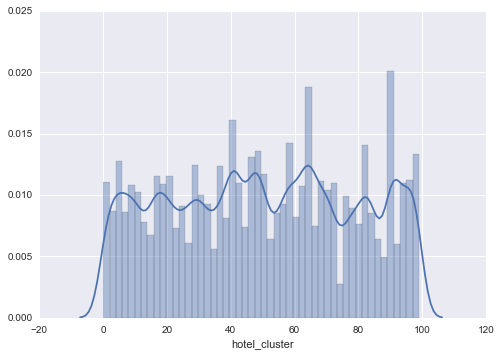

In [12]:
import seaborn as sns
sns.distplot(selected_train["hotel_cluster"])
plt.show()

/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


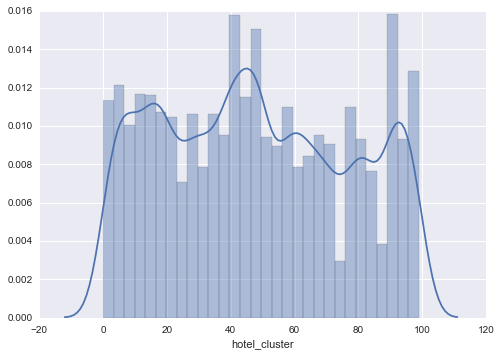

In [13]:
df_SelectedBooked = selected_train[bookCondition]
sns.distplot(df_SelectedBooked["hotel_cluster"])
plt.show()